In [41]:
import numpy as np
import matplotlib.pyplot as plt

name_str='frequency130sample{}.npz'
sample_list = np.arange(500,600,10)
std_w_range = np.arange(0,1,0.1)
axis_std_w1 = np.arange(0.006, 0.01, 0.001)
axis_std_w2 = np.arange(0.008, 0.01, 0.001)
std_w1_axis, std_w2_axis = np.meshgrid(axis_std_w1,axis_std_w2)
train_accuracy_10_samples = np.zeros((10,4,2))
test_accuracy_10_samples = np.zeros((10,4,2))


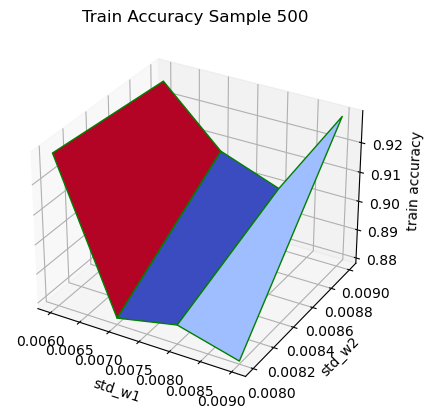

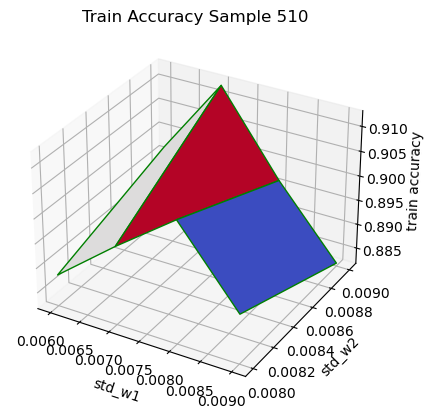

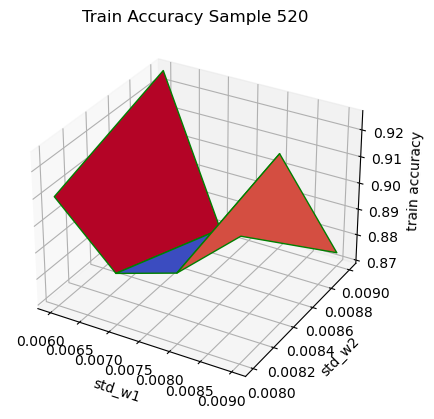

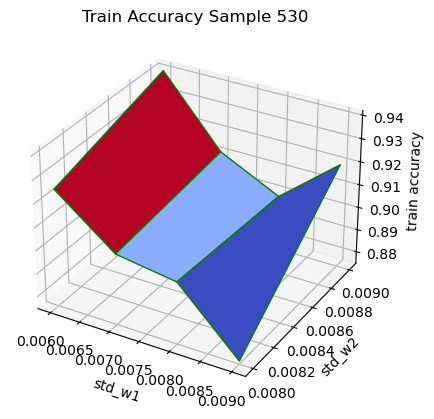

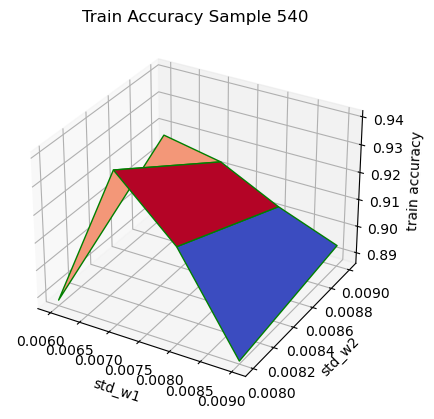

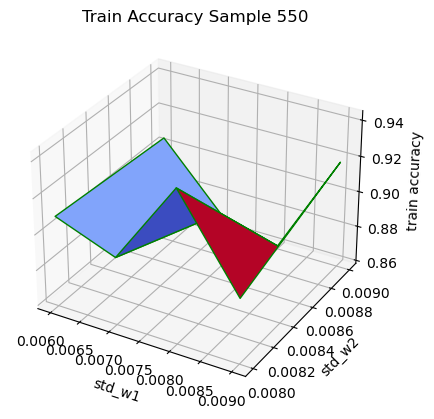

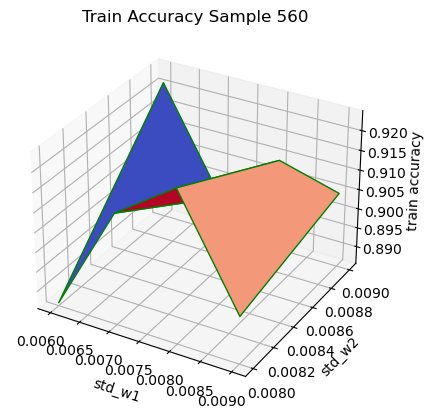

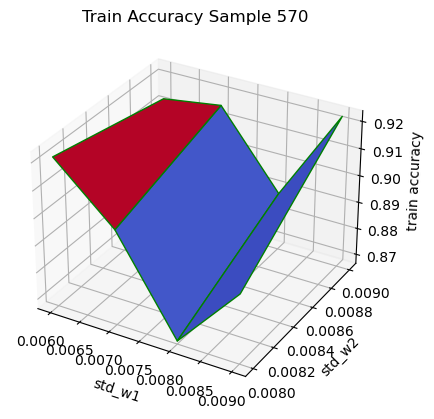

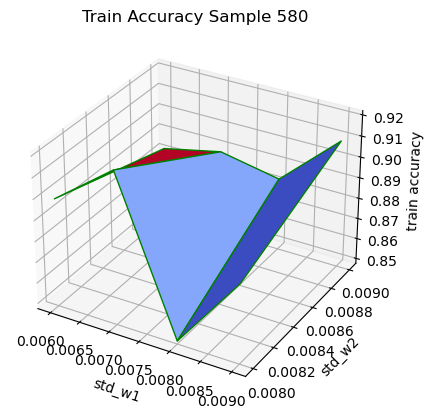

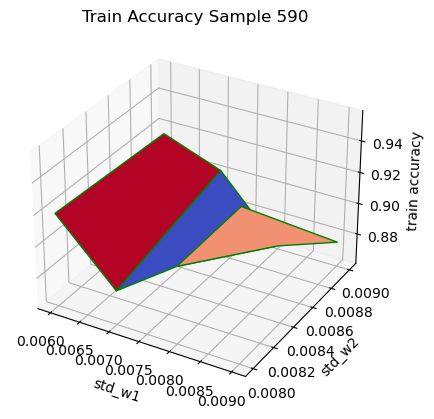

In [42]:
for (i,sample) in enumerate(sample_list):
    data = np.load(name_str.format(sample))
    fig = plt.figure()
    ax = plt.axes(projection ='3d')
    ax.plot_surface(std_w1_axis, std_w2_axis, data['train_accuracy_w1_w2'].T, cmap ='coolwarm', edgecolor ='green')
    ax.set_xlabel('std_w1')
    ax.set_ylabel('std_w2')
    ax.set_zlabel('train accuracy')
    ax.set_title('Train Accuracy Sample {}'.format(sample))
    fig.savefig("train_accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in enumerate(axis_std_w1):
        for (k,std_w2) in enumerate(axis_std_w2):
            train_accuracy_10_samples[i][j][k]= data['train_accuracy_w1_w2'][j][k]

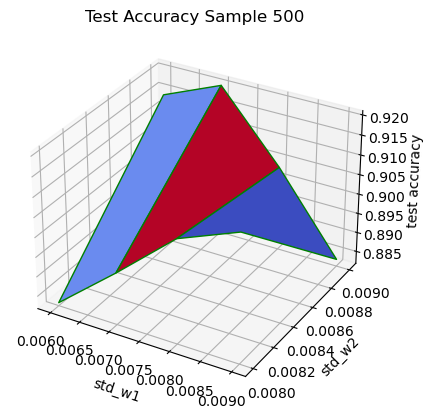

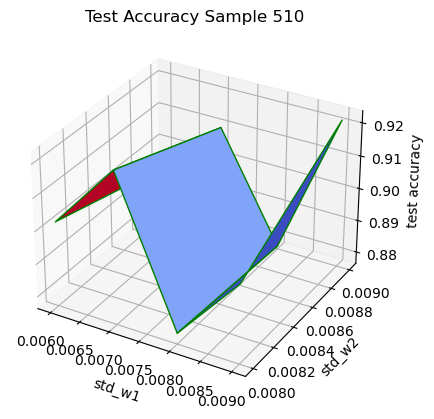

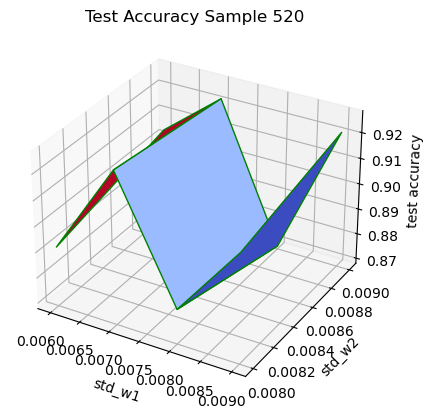

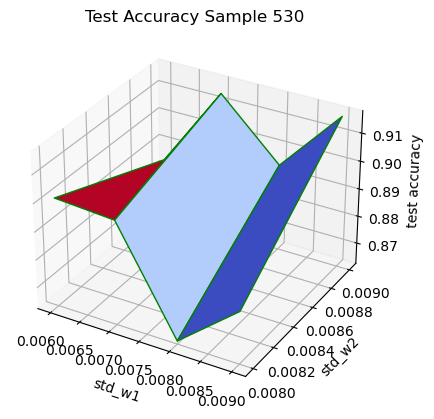

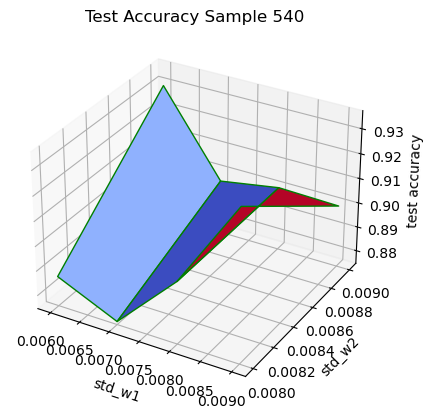

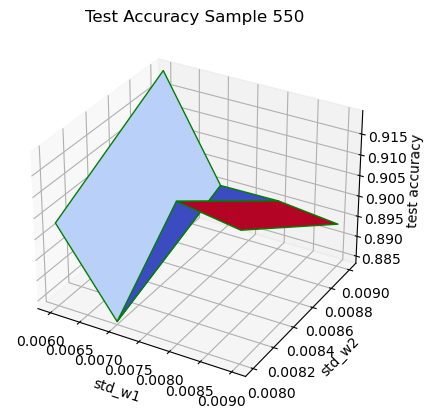

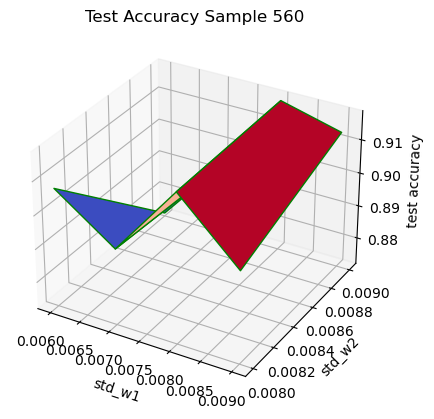

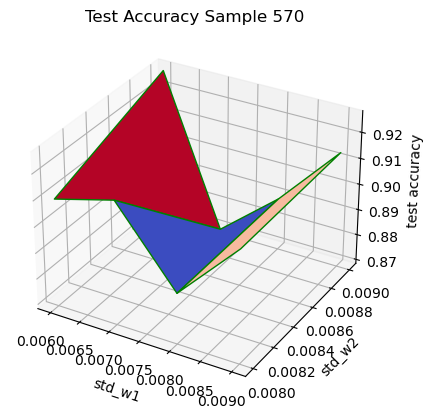

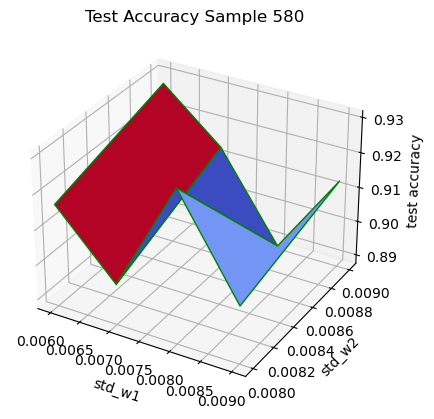

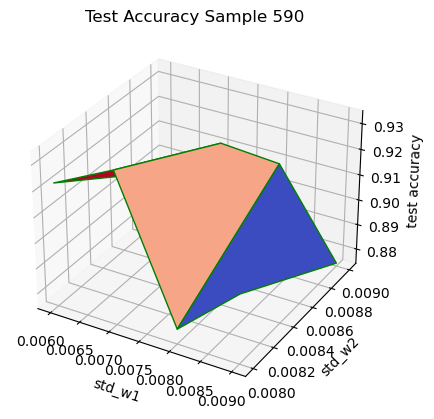

In [43]:
for (i,sample) in enumerate(sample_list):
    data = np.load(name_str.format(sample))
    fig = plt.figure()
    ax = plt.axes(projection ='3d')
    ax.plot_surface(std_w1_axis, std_w2_axis, data['test_accuracy_w1_w2'].T, cmap ='coolwarm', edgecolor ='green')
    ax.set_xlabel('std_w1')
    ax.set_ylabel('std_w2')
    ax.set_zlabel('test accuracy')
    ax.set_title('Test Accuracy Sample {}'.format(sample))
    fig.savefig("test_accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in enumerate(axis_std_w1):
        for (k,std_w2) in enumerate(axis_std_w2):
            test_accuracy_10_samples[i][j][k]= data['test_accuracy_w1_w2'][j][k]


In [44]:
average_train_accuracy_grid_10_by_10_10_samples = np.mean(train_accuracy_10_samples, axis=0)
average_train_accuracy_grid_10_by_10_10_samples

array([[0.90762553, 0.91423444],
       [0.90269765, 0.8983724 ],
       [0.90027711, 0.89045473],
       [0.89765291, 0.90305656]])

In [45]:
average_test_accuracy_grid_10_by_10_10_samples = np.mean(test_accuracy_10_samples, axis=0)
average_test_accuracy_grid_10_by_10_10_samples

array([[0.90234375, 0.90634014],
       [0.90480769, 0.90439704],
       [0.89650441, 0.89429087],
       [0.90732171, 0.90507812]])

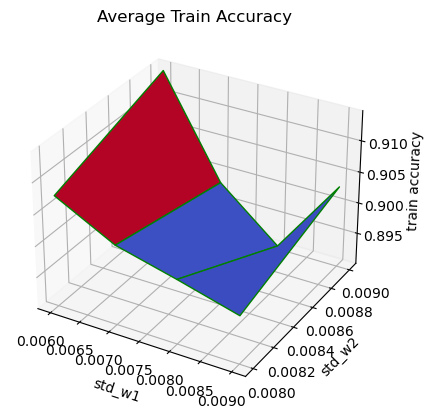

In [46]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(std_w1_axis, std_w2_axis, average_train_accuracy_grid_10_by_10_10_samples.T, cmap ='coolwarm', edgecolor ='green')
ax.set_xlabel('std_w1')
ax.set_ylabel('std_w2')
ax.set_zlabel('train accuracy')
ax.set_title('Average Train Accuracy')
fig.savefig("average_train_accuracy_grid_over_10_samples.png".format(sample))


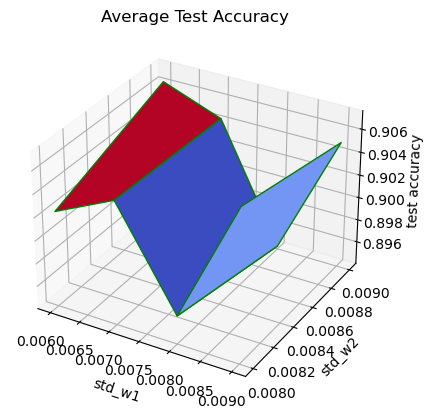

In [47]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(std_w1_axis, std_w2_axis, average_test_accuracy_grid_10_by_10_10_samples.T, cmap ='coolwarm', edgecolor ='green')
ax.set_xlabel('std_w1')
ax.set_ylabel('std_w2')
ax.set_zlabel('test accuracy')
ax.set_title('Average Test Accuracy')
fig.savefig("average_test_accuracy_grid_over_10_samples.png".format(sample))

In [48]:
# Find the best w1, w2 given the average accuracy of the grid

max_accuracy = np.max(average_train_accuracy_grid_10_by_10_10_samples.T*100)
index_max_accuracy = np.argmax(average_train_accuracy_grid_10_by_10_10_samples.T)
best_w1_w2 = np.unravel_index(index_max_accuracy, average_train_accuracy_grid_10_by_10_10_samples.T.shape)

In [49]:
best_w1_w2

(1, 0)

In [50]:
array_best_w1_best_w2 = np.array(best_w1_w2)*0.1

In [51]:
average_train_accuracy_grid_10_by_10_10_samples[1].T

array([0.90269765, 0.8983724 ])

In [52]:
average_train_accuracy_grid_10_by_10_10_samples[:,0].T

array([0.90762553, 0.90269765, 0.90027711, 0.89765291])

In [53]:
# Find the std of w1 with constant w2 and std of w2 with constant w1
std_dev_w1 = np.std(average_train_accuracy_grid_10_by_10_10_samples[1].T)
std_dev_w2 = np.std(average_train_accuracy_grid_10_by_10_10_samples[:,0].T)

In [54]:
# Find the std of w1 with constant w2 and std of w2 with constant w1
test_std_dev_w1 = np.std(average_test_accuracy_grid_10_by_10_10_samples[1].T)
test_std_dev_w2 = np.std(average_test_accuracy_grid_10_by_10_10_samples[:,0].T)

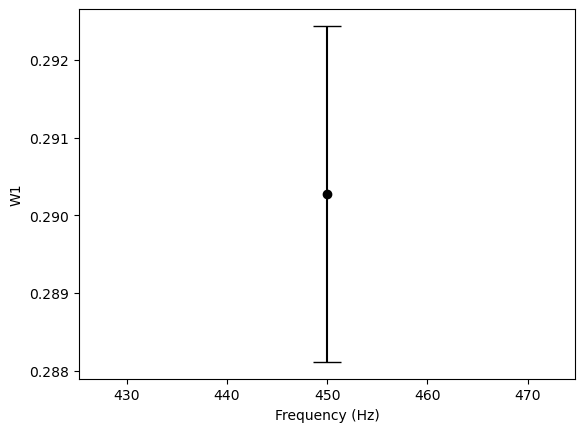

In [55]:
fig, ax = plt.subplots()
ax.scatter(450, array_best_w1_best_w2[0]/0.3445, color="k")
ax.errorbar(450, array_best_w1_best_w2[0]/0.3445, std_dev_w1, capsize = 10.0, color= "k")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("W1")
fig.savefig("train_accuracy_frequency130forW1.png")

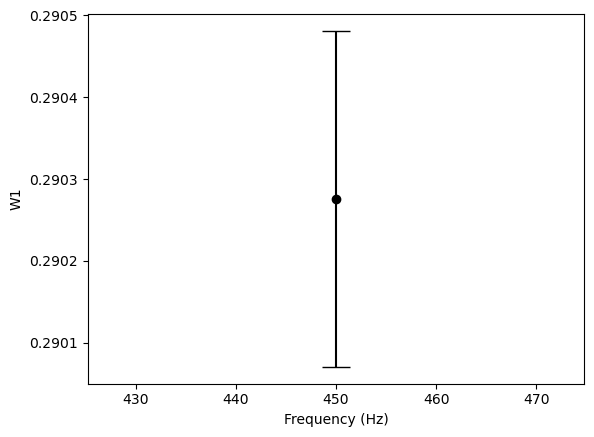

In [56]:
fig, ax = plt.subplots()
ax.scatter(450, array_best_w1_best_w2[0]/0.3445, color="k")
ax.errorbar(450, array_best_w1_best_w2[0]/0.3445, test_std_dev_w1, capsize = 10.0, color= "k")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("W1")
fig.savefig("test_accuracy_frequency130forW1.png")

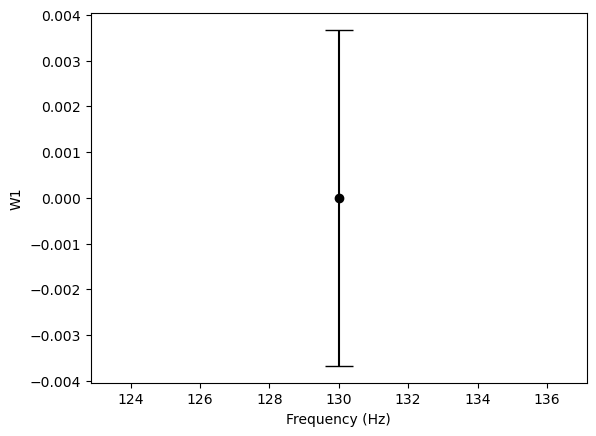

In [57]:
fig2, ax2 = plt.subplots()
ax2.scatter(130, array_best_w1_best_w2[1]/0.3445, color="k")
ax2.errorbar(130, array_best_w1_best_w2[1]/0.3445, std_dev_w2, capsize=10.0, color= "k")
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("W1")
fig2.savefig("train_accuracy_frequency130forW2.png")

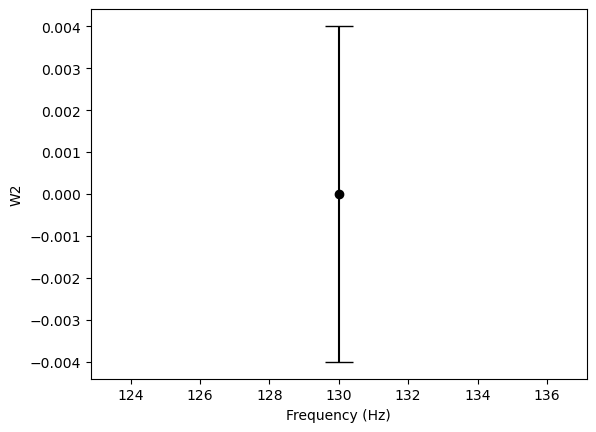

In [58]:
fig2, ax2 = plt.subplots()
ax2.scatter(130, array_best_w1_best_w2[1]/0.3445, color="k")
ax2.errorbar(130, array_best_w1_best_w2[1]/0.3445, test_std_dev_w2, capsize=10.0, color= "k")
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("W2")
fig2.savefig("train_accuracy_frequency130forW2.png")

In [59]:
data = {}
data['frequency'] = 130
data['w1'] = array_best_w1_best_w2[0]/0.3445
data['std_dev_w1_10_samples'] = std_dev_w1
data['w2'] = array_best_w1_best_w2[1]/0.3445
data['std_dev_w2_10_samples'] = std_dev_w2
np.savez("130_frequency_neurons_w1_w2.npz",**data)